In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Importing the Data 

In [2]:
train_df=pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
test_df=pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')

In [3]:
train_df.head()
test_df.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

# **Data Preprocessing**

* **Training Data Prepocessing **

In [5]:
train_df.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


In [6]:
train_df.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [7]:
train_na=train_df.isnull().sum()
percentage = train_df.isnull().mean() * 100
missing = pd.DataFrame({'Missing Values(train)':train_na, 'Percentage':percentage})
missing


,Missing Values(train),Percentage
id,0,0.000000
class,0,0.000000
cap-diameter,4,0.000128
cap-shape,40,0.001283
cap-surface,671023,21.528227
cap-color,12,0.000385
does-bruise-or-bleed,8,0.000257
gill-attachment,523936,16.809280
gill-spacing,1258435,40.373988
gill-color,57,0.001829


In [8]:
#dropping columns with more than 50% (training)
col_na=train_df.loc[:, ['stem-root','stem-surface','veil-type','veil-color','spore-print-color']]
new_train_df=train_df.drop(columns=col_na)
new_train_df
new_train_df.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-color                   38
has-ring                     24
ring-type                128880
habitat                      45
season                        0
dtype: int64

In [9]:
#Replacing NAs with the mode (training dataset)
col = new_train_df.columns
train = new_train_df.fillna(new_train_df.mode().iloc[0])
train.isnull().sum()



id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

* **Test Data Prepocessing **

In [10]:
test_df.describe()

,id,cap-diameter,stem-height,stem-width
count,2.077964e+06,2.077957e+06,2.077963e+06,2.077964e+06
mean,4.155926e+06,6.306192e+00,6.346509e+00,1.114837e+01
std,5.998567e+05,4.685462e+00,2.698978e+00,8.100181e+00
min,3.116945e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636436e+06,3.310000e+00,4.670000e+00,4.970000e+00
50%,4.155926e+06,5.740000e+00,5.880000e+00,9.640000e+00
75%,4.675417e+06,8.230000e+00,7.410000e+00,1.562000e+01
max,5.194908e+06,6.070000e+02,5.729000e+01,1.029100e+02


In [11]:
test_df.isnull().sum()

id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

In [12]:
test_na=test_df.isnull().sum()
percentage = test_df.isnull().mean() * 100
missing_test = pd.DataFrame({'Missing Values(train)':test_na, 'Percentage':percentage})
missing_test

,Missing Values(train),Percentage
id,0,0.000000
cap-diameter,7,0.000337
cap-shape,31,0.001492
cap-surface,446904,21.506821
cap-color,13,0.000626
does-bruise-or-bleed,10,0.000481
gill-attachment,349821,16.834796
gill-spacing,839595,40.404694
gill-color,49,0.002358
stem-height,1,0.000048


In [13]:
#dropping columns with more than 50% (test dataset)
col_na=test_df.loc[:, ['stem-root','stem-surface','veil-type','veil-color','spore-print-color']]
new_test_df=test_df.drop(columns=col_na)
new_test_df
new_train_df.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-color                   38
has-ring                     24
ring-type                128880
habitat                      45
season                        0
dtype: int64

In [14]:
#Replacing NAs with the mode (test dataset)
col_test = new_test_df.columns
test = new_test_df.fillna(new_test_df.mode().iloc[0])
test.isnull().sum()

id                      0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

# ** Exploratory data analysis**

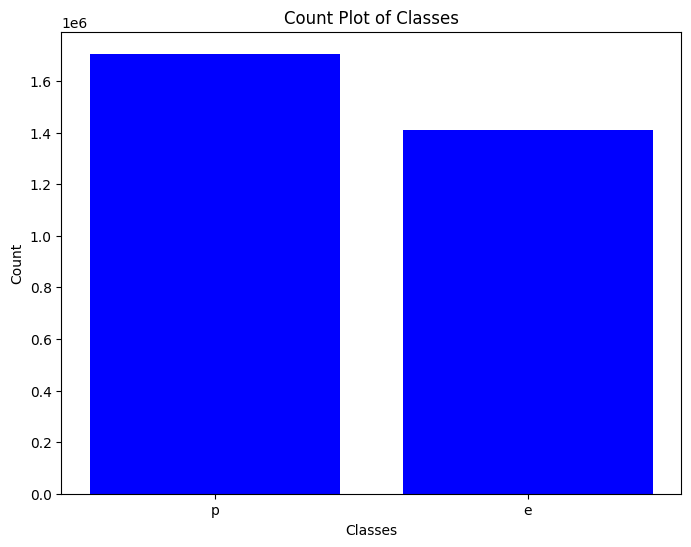

In [15]:
#Count plot of classes (edible (e) and poisonous(p))
class_counts = train['class'].value_counts() 

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts, color='blue')
plt.title('Count Plot of Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

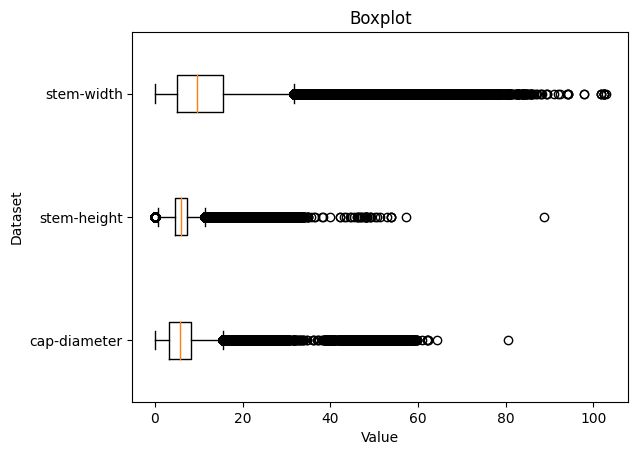

In [16]:
#Boxplot for cap diameter, step height and stem weidth: Presence of outliers
plt.boxplot(train[['cap-diameter', 'stem-height', 'stem-width']],  
            labels=['cap-diameter', 'stem-height', 'stem-width'], 
            vert=False)

# Plots graph
plt.title('Boxplot')
plt.xlabel('Value')
plt.ylabel('Dataset')
plt.show()

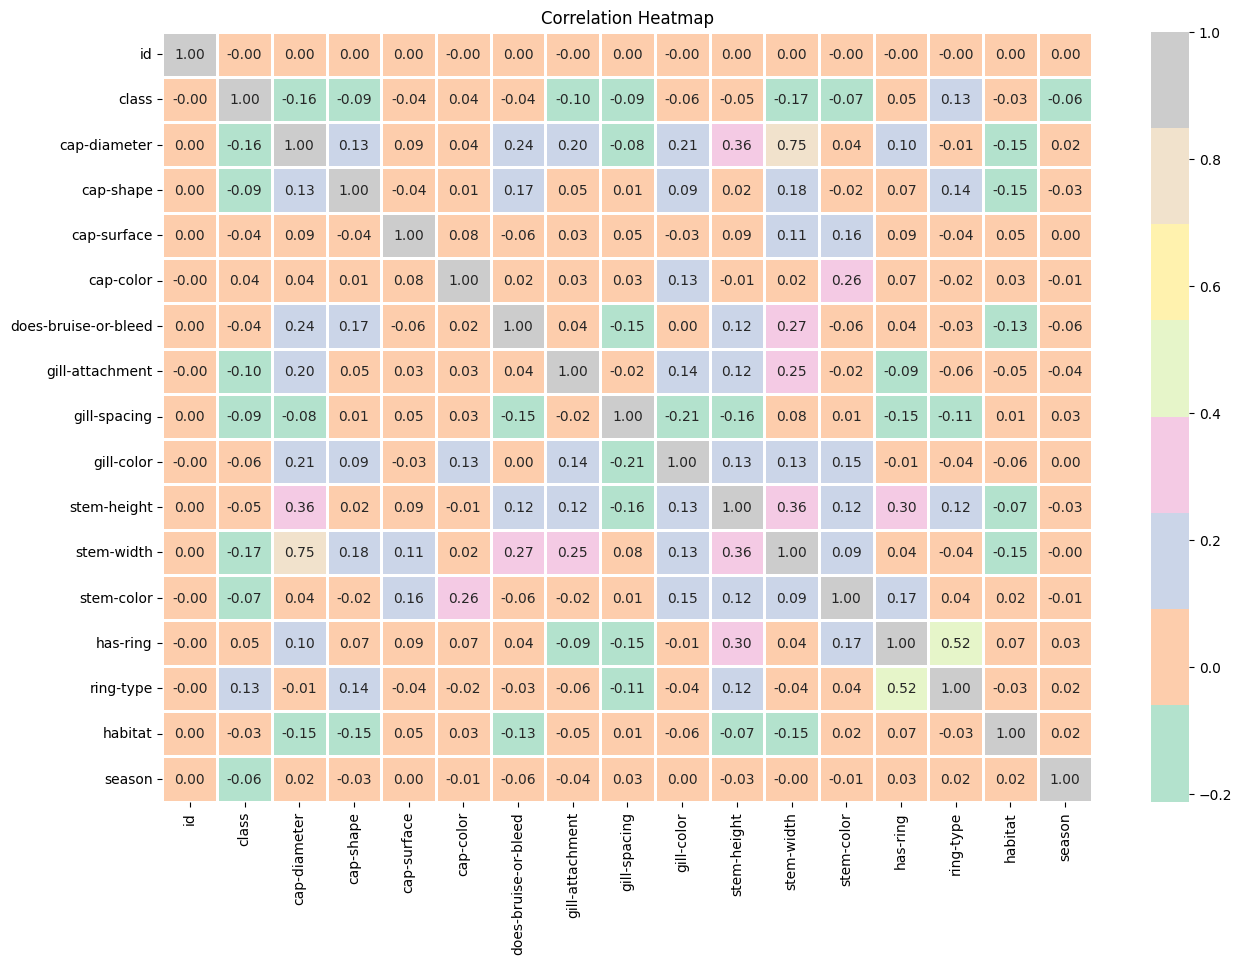

In [17]:
#Correlation Heatmap

label_encoders = {}
for column in train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column])
    label_encoders[column] = le
    
    
plt.figure(figsize=(15, 10))

sns.heatmap(train.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()




# **Data Analysis**

In [18]:
one_hot_encoded_training = pd.get_dummies(train)
one_hot_encoded_test = pd.get_dummies(test)


In [19]:
# Separate features and target
X = one_hot_encoded_training.drop('class', axis=1)
y = one_hot_encoded_training['class']



# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [20]:
# Align columns of the test set to match the training set
aligned_test = one_hot_encoded_test.copy()

# Add any missing columns in the test set
for col in X.columns:
    if col not in aligned_test.columns:
        aligned_test[col] = 0  # Fill missing columns with 0

# Ensure the column order matches
aligned_test = aligned_test[X.columns]

# Predict using the fitted model
test_pred = model.predict(aligned_test)
print("Predicted class labels:", test_pred)



Predicted class labels: [1 1 1 ... 1 1 1]


In [21]:
print(len(test_pred))
print(len(test))

2077964
2077964


In [22]:
submission = pd.DataFrame({'id': test['id'], 'class': test_pred })


In [23]:
submission.head()

,id,class
0,3116945,1
1,3116946,1
2,3116947,1
3,3116948,1
4,3116949,1


In [24]:
pred_d = pd.DataFrame(test_pred, columns=['class']) 
pred_d['class'] = pred_d['class'].map({0: 'e', 1:'p'}) 
pred_d

,class
0,p
1,p
2,p
3,p
4,p
...,...
2077959,p
2077960,p
2077961,p
2077962,p


In [25]:
submit = pd.read_csv("/kaggle/input/playground-series-s4e8/sample_submission.csv")
submit['class'] = pred_d['class']
submit.to_csv("submission.csv", index=False) 

In [26]:
submit

,id,class
0,3116945,p
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,p
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,p
